#### Performing the Standard Verification Routine with the Caravagna-J-Theor-Biol-2010 publication.

In [1]:
import sys
import os

import numpy as np
from process_bigraph import Composite

from biosimulator_processes.io import read_report_outputs
from biosimulator_processes.utils import plot_ode_output_data


sys.path.insert(0, '..')

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = '../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations'
os.path.exists(omex_dir)
model_fp = os.path.join(omex_dir, 'Caravagna2010.xml')

In [3]:
# read "ground truth" output aka that which is PUBLISHED as the omex dir (including reports). Publication itself is a Validation Phase, according to the Standard Validation Routine

published_outputs = read_report_outputs(os.path.join(omex_dir, 'reports.h5'))

In [4]:
# published outputs are easily serializable

published_outputs.to_dict()

{'report_path': '../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5',
 'data': [{'dataset_label': 'time',
   'data': array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.996e+02, 9.998e+02,
          1.000e+03])},
  {'dataset_label': 'T',
   'data': array([  1.        ,   1.03663447,   1.07461102, ..., 294.20912519,
          304.52170256, 315.19840046])},
  {'dataset_label': 'E',
   'data': array([1.00000000e+00, 9.98078674e-01, 9.96317603e-01, ...,
          2.45472790e+03, 2.44123741e+03, 2.42786947e+03])},
  {'dataset_label': 'I',
   'data': array([1.00000000e+00, 1.35378335e-01, 1.83660859e-02, ...,
          3.18793211e+01, 3.27198886e+01, 3.35804183e+01])}]}

In [5]:
class Workflow(Composite):
    # TODO: finish this.
    def __init__(self, config=None, core=None):
        super().__init__(config, core)

In [6]:
from biosimulator_processes.steps.ode_simulation import AmiciStep

In [7]:
amici_step = AmiciStep(archive_filepath=omex_dir, sbml_filepath=model_fp, model_dir=os.getcwd())

2024-05-28 19:06:42.980 - amici.sbml_import - INFO - Finished importing SBML                         (3.61E-02s)
2024-05-28 19:06:42.994 - amici.sbml_import - INFO - Finished processing SBML observables            (1.15E-02s)
2024-05-28 19:06:42.998 - amici.sbml_import - INFO - Finished processing SBML event observables      (5.42E-07s)
2024-05-28 19:06:43.017 - amici.de_model - INFO - Finished computing xdot                            (2.85E-03s)
2024-05-28 19:06:43.023 - amici.de_model - INFO - Finished computing x0                              (2.87E-03s)
2024-05-28 19:06:43.037 - amici.de_model - INFO - Finished computing w                               (1.07E-02s)


[0.0, 0.2, 0.4, 199.8, 200]
True


2024-05-28 19:06:43.552 - amici.de_export - INFO - Finished generating cpp code                      (5.10E-01s)
2024-05-28 19:06:51.300 - amici.de_export - INFO - Finished compiling cpp code                       (7.74E+00s)
2024-05-28 19:06:51.413 - amici.sbml_import - INFO - Finished loading SBML                           (1.05E-02s)
2024-05-28 19:06:51.448 - amici.sbml_import - INFO - Finished importing SBML                         (3.06E-02s)
2024-05-28 19:06:51.454 - amici.sbml_import - INFO - Finished processing SBML observables            (2.60E-03s)
2024-05-28 19:06:51.458 - amici.sbml_import - INFO - Finished processing SBML event observables      (2.91E-07s)
2024-05-28 19:06:51.471 - amici.de_model - INFO - Finished computing xdot                            (2.59E-03s)
2024-05-28 19:06:51.478 - amici.de_model - INFO - Finished computing x0                              (3.35E-03s)
2024-05-28 19:06:51.488 - amici.de_model - INFO - Finished computing w                          

../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5


2024-05-28 19:06:51.927 - amici.de_export - INFO - Finished generating cpp code                      (4.35E-01s)
2024-05-28 19:06:59.241 - amici.de_export - INFO - Finished compiling cpp code                       (7.31E+00s)


In [8]:
amici_results = amici_step.update({})

In [9]:
amici_results

{'time': array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.996e+02, 9.998e+02,
        1.000e+03]),
 'floating_species': {'yT': array([  1.        ,   1.0366552 ,   1.074654  , ..., 198.2429754 ,
         205.17989464, 212.36149005]),
  'yE': array([1.00000000e+00, 9.98078715e-01, 9.96317770e-01, ...,
         2.57901433e+03, 2.56439094e+03, 2.54988317e+03]),
  'yI': array([1.00000000e+00, 1.35378472e-01, 1.83661502e-02, ...,
         2.31982472e+01, 2.38257423e+01, 2.44691145e+01]),
  'ycompartment': array([1., 1., 1., ..., 1., 1., 1.])}}

In [10]:
from biosimulator_processes.steps.ode_simulation import CopasiStep 

copasi_step = CopasiStep(archive_filepath=omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True
../examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/reports.h5


In [11]:
copasi_results = copasi_step.update({})

In [12]:
copasi_results

{'time': array([0.000e+00, 2.000e-01, 4.000e-01, ..., 9.996e+02, 9.998e+02,
        1.000e+03]),
 'floating_species': {'T': array([1.        , 1.00722586, 1.01450393, ..., 0.0022741 , 0.00228443,
         0.00229481]),
  'E': array([1.00000000e+00, 9.99603126e-01, 9.99212526e-01, ...,
         2.13769774e+04, 2.13513404e+04, 2.13257342e+04]),
  'I': array([1.        , 0.67033623, 0.44935627, ..., 0.00235416, 0.002362  ,
         0.00236986])}}

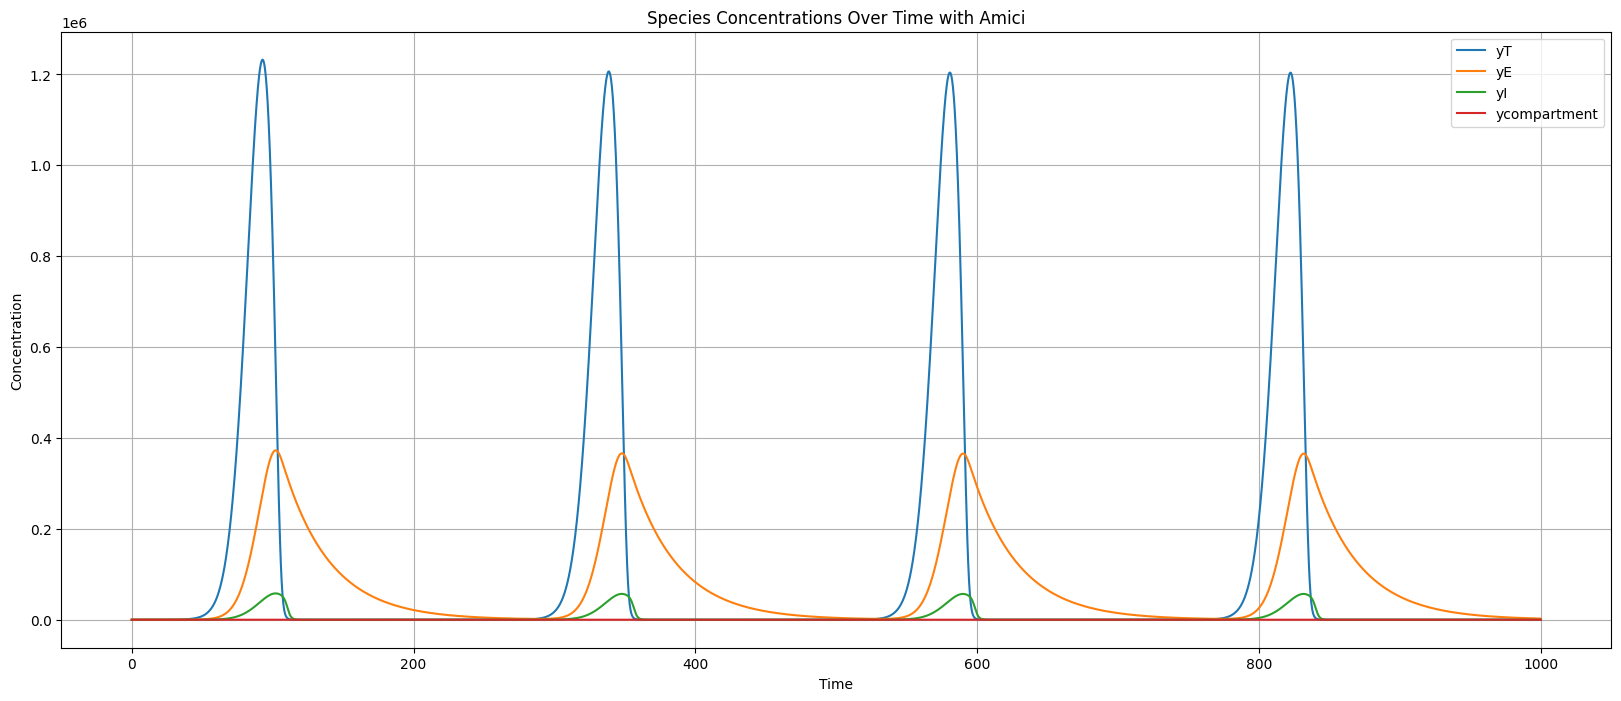

In [13]:
plot_ode_output_data(amici_results, simulator_name='Amici')

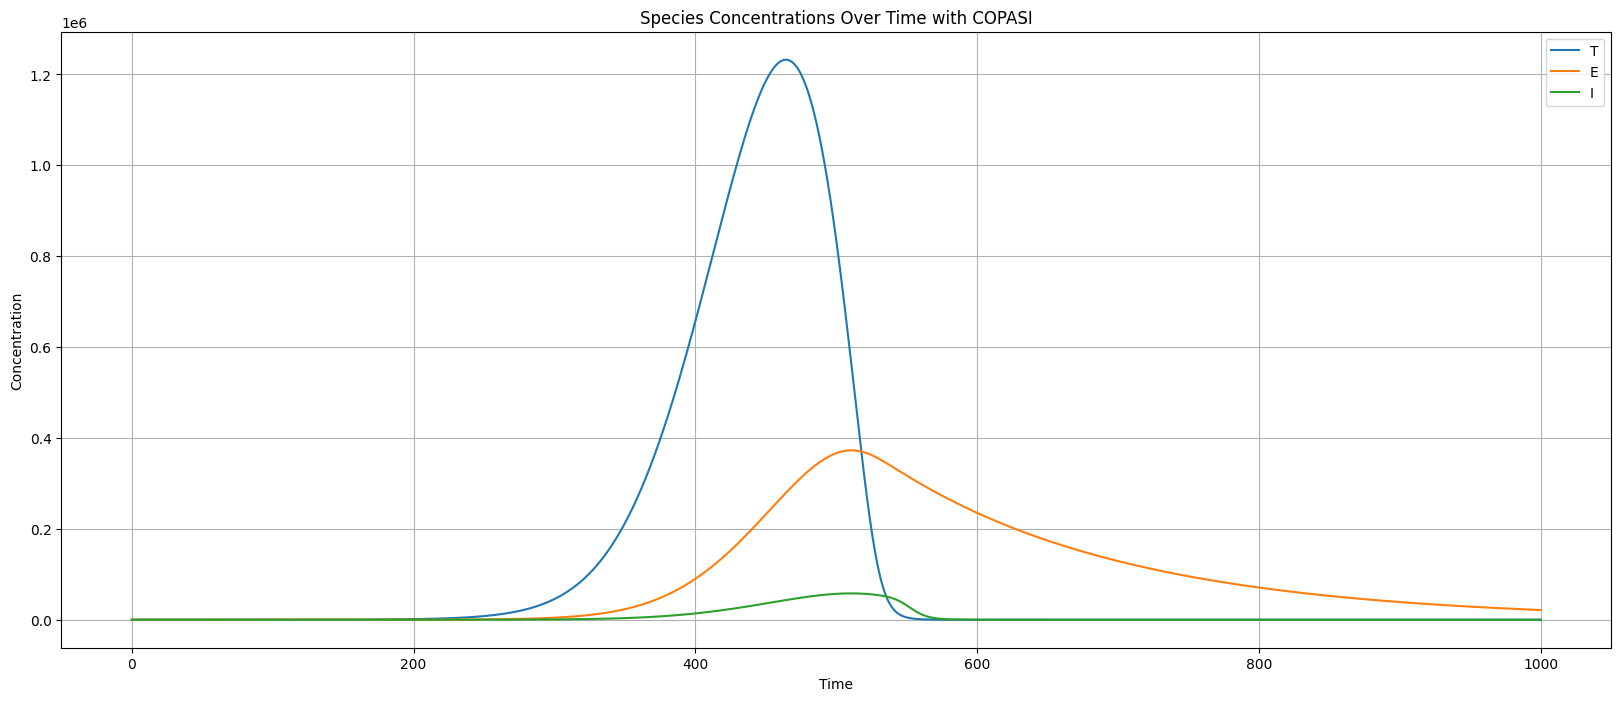

In [14]:
plot_ode_output_data(copasi_results, simulator_name='COPASI')